170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.2719 - loss: 1.9493 - val_accuracy: 0.4951 - val_loss: 1.4525
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 56s 45ms/step - accuracy: 0.4522 - loss: 1.5060 - val_accuracy: 0.5667 - val_loss: 1.2529
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 45ms/step - accuracy: 0.5083 - loss: 1.3552 - val_accuracy: 0.6035 - val_loss: 1.1354
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5396 - loss: 1.2708 - val_accuracy: 0.6184 - val_loss: 1.0922
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.5695 - loss: 1.2049 - val_accuracy: 0.6336 - val_loss: 1.0490
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6337 - loss: 1.0409

✅ Test Accuracy: 0.6336


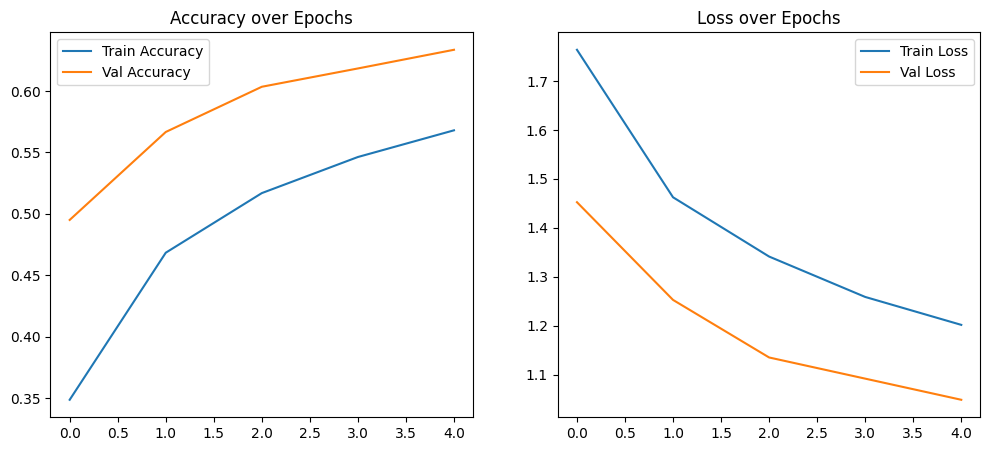

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


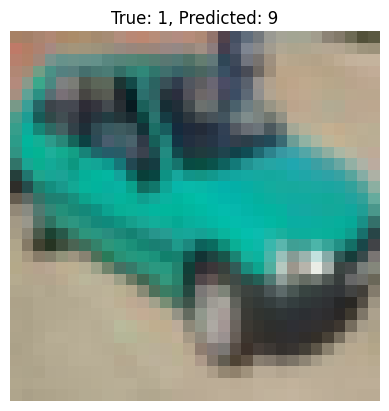

In [ ]:
# 🔧 Install TensorFlow (if not already)
!pip install -q tensorflow

# 📦 Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# 📥 Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 🔃 Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# 🧠 Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# ⚙️ Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 🚀 Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 🎯 Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 📊 Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.legend()
plt.show()

# 🖼️ Predict a sample
idx = np.random.randint(len(x_test))
img = x_test[idx]
true_label = y_test[idx][0]
pred_label = np.argmax(model.predict(img.reshape(1, 32, 32, 3)))
plt.imshow(img)
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis('off')
plt.show()
